# Mchezopesa LTD FIFA ANALYSYS: 
## A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly 

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### b) Defining the Metric for Success
<p> Rank of home team
<p> Rank of away team
<p> Tournament type

### c) Understanding the context 
<p> FIFA introduced football ranking in 1993 to display teams ranking as per the games played, wins, loses, drawa and previous points. The rank is done by accumulative points. Every time a team plays, its ranking changes. Ranking is done periodilcally. 
<p> In many cases, a team that plays another team that has higher rank is likely to win the match

### d) Recording the Experimental Design
<p> This project will be understake by doing a logistic regresions. I will train a model using tournament type, home team, away teamand Fifa ranking on the results which is win, draw or lose. Fifa ranking changes per year hence when feeding the model for prediting will have the year which will determin the team's ranking that year. 

### e) Data Relevance
<p> We have two data sets to work with
<p> 1. The Fifa ranking dataset which shows ranking for each team periodically. We will comeupe with a new dataset from this that displays the ranking per team per year
<p> 2.,. Fifa resuls: This shows each game results whenever the teams play. It has the date, teams, tournament type, and score. With this we will append results(W,D,L) and official Fifa ranking that year depending on the year they have played. 

## 2. Reading the Data

In [158]:
# Loading the Dataset
# Dataset url = http://bit.ly/EcommerceDataset 
#

## 3. Checking the Data

### Importing required libraries 

In [159]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt


### Load data

In [160]:
fifa_ranking = pd.read_csv('data/fifa_ranking.csv')
fifa_results=pd.read_csv('data/results.csv')


In [161]:
# Determining the no. of records in our dataset
fifa_ranking.shape

(57793, 16)

In [162]:
fifa_results.shape

(40839, 9)

In [163]:
# Previewing the top of our dataset
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [164]:
# Previewing the bottom of our dataset
fifa_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


### checking and making sure each colum has appropriate data types 

In [165]:
# Checking whether Fifa ranking has an appropriate datatype
#
fifa_ranking.info()
#Date  need to be converted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [166]:
# convert date colukns to date type
fifa_ranking['rank_date']=pd.to_datetime(fifa_ranking['rank_date'])


In [167]:
#Fifa results data types
#convert date to date type
fifa_results['date']=pd.to_datetime(fifa_results['date'])
fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

<p> We took some records of fifa ranking and checked against official fifa ranking. Its correct. We also checked games played over time and realized the data given is correct representation of FIFA football match played. 

## 5. Tidying the Dataset

In [168]:
# Checking for Outliers
#

In [169]:
# Checking for Anomalies
#

<AxesSubplot:>

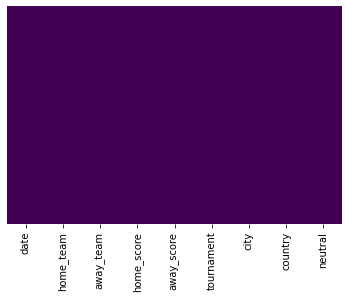

In [170]:
# Identifying the Missing Data
sns.heatmap(fifa_results.isnull(), yticklabels=False,cbar=False, cmap='viridis')


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

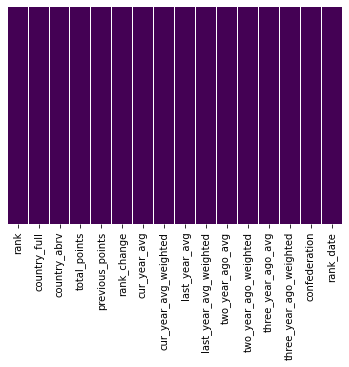

In [171]:
# missing data in the fifa ranking 

sns.heatmap(fifa_ranking.isnull(), yticklabels=False,cbar=False, cmap='viridis')
fifa_ranking.isnull().sum()

### Seems there are no missing values. However, when we merge the dataset or assign the values of ranking to fifa results table we are likely to get missing values 

In [172]:
# Dealing with the Missing Data
#

###  More data cleaning procedures

In [173]:
#Add year to the two datasets using dt.year method 
fifa_results['Year']= fifa_results['date'].dt.year
fifa_ranking['Year']=fifa_ranking['rank_date'].dt.year

In [174]:
# Creating a dataset of fifa results to incorporat only years that are in fifa ranking
Years = list(fifa_ranking['Year'].unique())
#get those games from 1993 when fifa started ranking teams
fifa_results = fifa_results[fifa_results['Year'].isin(Years)]
fifa_results

#

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993
...,...,...,...,...,...,...,...,...,...,...
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018


In [175]:
# create a new dataframe for fifa ranking that wwill show teams and ranks per year
new_ranks=fifa_ranking.set_index('country_full')[['rank','Year']].drop_duplicates().reset_index()
new_ranks.head()

,country_full,rank,Year
0,Germany,1,1993
1,Italy,2,1993
2,Switzerland,3,1993
3,Sweden,4,1993
4,Argentina,5,1993


### append ranks and results to fifa results table

In [176]:
# Function to append home and away rank
def update_rank(country, year):
    home_rank= new_ranks[(new_ranks['country_full']==country) & (new_ranks['Year']==year)]['rank'].values#.reshape([1])
    return home_rank

In [177]:
#Append home rank using the function by creating  a new column 
fifa_results['Home_rank'] = fifa_results.apply(lambda x: update_rank(x['home_team'], x['Year']), axis=1)


In [178]:
#Append home rank using the function by creating  a new column 
fifa_results['Away_rank'] = fifa_results.apply(lambda x: update_rank(x['away_team'], x['Year']), axis=1)

In [179]:
#Outpu the file 
#fifa_results.to_csv('data/fifa_results.csv')

In [180]:
# Read the new cleaned dataset 
fifa_df = pd.read_csv('fifa_results_ranks.csv')
fifa_df['Home_rank']=fifa_df['Home_rank'].str.split(' ').str[0]
fifa_df['Away_rank']=fifa_df['Away_rank'].str.split(' ').str[0]
fifa_df['Home_rank']=fifa_df['Home_rank'].apply(pd.to_numeric)
fifa_df['Away_rank']=fifa_df['Away_rank'].apply(pd.to_numeric)
fifa_df.dropna(inplace=True)

In [181]:
# Convert home rand and away rank to integer for use in the machine learning
fifa_df['Home_rank']=fifa_df['Home_rank'].astype(int)
fifa_df['Away_rank']=fifa_df['Away_rank'].astype(int)



In [182]:
# add results D,W,L as per the match results
#create status column for home perspective 
def status_col(home_score,away_score):
    if home_score>away_score:
        results = 'W'
    elif home_score<away_score:
        results = 'L'
    else:
        results = 'D'
    return results
fifa_df['Results'] = fifa_df.apply(lambda x: status_col(x['home_score'], x['away_score']), axis=1)

In [183]:
#convert tournaments to categorial 
def convert_categorical_cols(data,col):
    colum_values = list(data[col].unique())
    dicts = {}
    values = range(len(colum_values))
    for i in range(len(colum_values)):
        dicts[colum_values[i]] = values[i]
        values = range(len(colum_values))
    print(dicts)
    data[col]=data[col].map(dicts)
#The function takes the dataset and the column and create a dictionary that maps all unique 
# column values to numerical values for machine learning 
convert_categorical_cols(fifa_df,'tournament')

{'Friendly': 0, 'African Cup of Nations qualification': 1, 'FIFA World Cup qualification': 2, 'Nehru Cup': 3, 'Merdeka Tournament': 4, "King's Cup": 5, 'UNCAF Cup': 6, 'Copa Paz del Chaco': 7, 'Kirin Cup': 8, 'CFU Caribbean Cup qualification': 9, 'CFU Caribbean Cup': 10, 'USA Cup': 11, 'Copa América': 12, 'Korea Cup': 13, 'Baltic Cup': 14, 'Gold Cup': 15, 'Amílcar Cabral Cup': 16, 'United Arab Emirates Friendship Tournament': 17, 'Malta International Tournament': 18, 'African Cup of Nations': 19, 'FIFA World Cup': 20, 'Oceania Nations Cup qualification': 21, 'UEFA Euro qualification': 22, 'Gulf Cup': 23, 'Simba Tournament': 24, 'CECAFA Cup': 25, 'Confederations Cup': 26, 'Dynasty Cup': 27, 'SAFF Cup': 28, 'South Pacific Games': 29, 'Oceania Nations Cup': 30, 'Windward Islands Tournament': 31, 'AFC Asian Cup qualification': 32, 'Lunar New Year Cup': 33, 'UEFA Euro': 34, 'AFF Championship': 35, 'AFC Asian Cup': 36, 'King Hassan II Tournament': 37, 'Cyprus International Tournament': 38, '

In [184]:
fifa_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Home_rank,Away_rank,Results
0,17361,1/1/1993,Ghana,Mali,1,1,0,Libreville,Gabon,True,1993,48,74,D
1,17362,1/2/1993,Gabon,Burkina Faso,1,1,0,Libreville,Gabon,False,1993,64,113,D
2,17363,1/2/1993,Kuwait,Lebanon,2,0,0,Kuwait City,Kuwait,False,1993,60,108,W
3,17364,1/3/1993,Burkina Faso,Mali,1,0,0,Libreville,Gabon,True,1993,113,74,W
4,17365,1/3/1993,Gabon,Ghana,2,3,0,Libreville,Gabon,False,1993,64,48,L


## 6. Exploratory Analysis

In [185]:
# Chcck the correlations between numeric variables 
fifa_df.corr()

#It shows that home score is negatively correlated to home rank. 
# This is because when a rank is high, the team perfemace is not good
#same case for away rank and score. 


,Unnamed: 0,home_score,away_score,tournament,neutral,Year,Home_rank,Away_rank
Unnamed: 0,1.000000,-0.040761,-0.008504,0.101147,0.023187,0.998416,0.087538,0.089003
home_score,-0.040761,1.000000,-0.162024,0.003977,-0.050210,-0.040476,-0.128491,0.303097
away_score,-0.008504,-0.162024,1.000000,0.039056,0.094757,-0.009207,0.203457,-0.167258
tournament,0.101147,0.003977,0.039056,1.000000,0.293839,0.100909,0.120080,0.122690
neutral,0.023187,-0.050210,0.094757,0.293839,1.000000,0.026886,0.003402,0.018748
Year,0.998416,-0.040476,-0.009207,0.100909,0.026886,1.000000,0.089285,0.090771
Home_rank,0.087538,-0.128491,0.203457,0.120080,0.003402,0.089285,1.000000,0.472720
Away_rank,0.089003,0.303097,-0.167258,0.122690,0.018748,0.090771,0.472720,1.000000


Text(0, 0.5, 'COUNT')

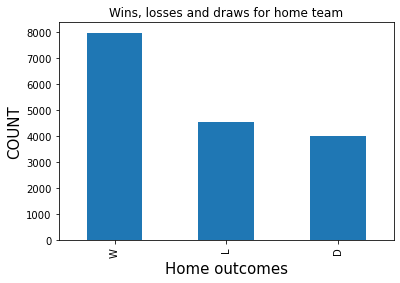

In [186]:
#Plot a graph on the for wins losses and draws for home team
#This shows that home teams win more than away team. Draws and losses seems to be balanced. 
fifa_df['Results'].value_counts().plot(kind='bar')
plt.title("Wins, losses and draws for home team")
plt.xlabel("Home outcomes",fontsize=15)
plt.ylabel("COUNT",fontsize=15)



## 7. Implementing the Solution

### Using logistics regression 

In [187]:
#Logistic regression model 
X = fifa_df[['tournament','Home_rank','Away_rank']]
y = fifa_df['Results']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [188]:
#making predictions 
predictions = logmodel.predict(X_test)


In [189]:
#check perfomance 
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
print(print('Accuracy' , accuracy_score(y_test, predictions)))
#The model has performed averagely 55% which is not soo good to help in predicting
#For draws, the models was unable to predict any. Its mostly able to predict win or loss


              precision    recall  f1-score   support

           D       0.00      0.00      0.00       777
           L       0.48      0.52      0.50       937
           W       0.58      0.84      0.69      1586

    accuracy                           0.55      3300
   macro avg       0.36      0.45      0.40      3300
weighted avg       0.42      0.55      0.47      3300

[[   0  264  513]
 [   0  489  448]
 [   0  256 1330]]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy 0.5512121212121213
None


C:\Users\ronal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8. Challenging the solution

> Our model might not be able to give correct predition given the surprising perfomance of footbal teams. Some teams that are highly ranked are beaten hence a winn turns to be a loss







In [190]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
Yes. Data given was well and enough to create  a model 

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

The question is well framed. Many companies need such questiona nd models to help gamblers predict the outcomes of games. Betting companies also need such models to know the odds to place on their games to avoid losses in betting.